In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
times = np.array([0,1,2,3,4,5,6,7,8,9,10]).reshape((-1, 1))
distances = np.array([ 0.24835708,  0.93086785,  2.32384427,  3.76151493,  3.88292331,
        4.88293152,  6.78960641,  7.38371736,  7.76526281,  9.27128002,
        9.76829115])
print(times)
print(distances)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[0.24835708 0.93086785 2.32384427 3.76151493 3.88292331 4.88293152
 6.78960641 7.38371736 7.76526281 9.27128002 9.76829115]


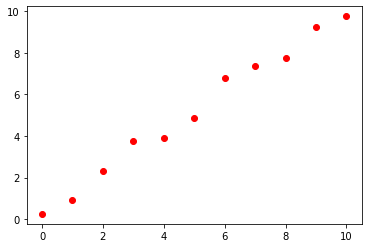

In [4]:
fig, axis = plt.subplots()
line = axis.plot(times, distances, linestyle="", marker="o", color="red")
plt.show()

.fit() for using data as input

In [5]:
model = LinearRegression().fit(times,distances)

In [6]:
r_sq = model.score(times, distances)
print('coefficient of determination:',r_sq)
print('coefficient of determination: {:.2f}'.format(r_sq))

coefficient of determination: 0.9877139378077583
coefficient of determination: 0.99


In [7]:
print('intercept: {:.2f}'.format(model.intercept_))
print('slope: {:.2f}'.format(model.coef_[0]))

intercept: 0.30
slope: 0.98


In [8]:
dist_pred = model.predict(times)
print('predicted response:', dist_pred, sep='\n')

predicted response:
[ 0.29911504  1.27581197  2.2525089   3.22920584  4.20590277  5.1825997
  6.15929663  7.13599357  8.1126905   9.08938743 10.06608437]


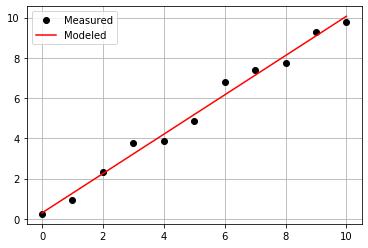

In [9]:
fig, axis = plt.subplots()
axis.plot(times, distances, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(times, dist_pred, linestyle="-", marker=None, color="red", label="Modeled")
axis.grid(True)
axis.legend(loc="best")
plt.show()

In [10]:
times_new = np.arange(11, 15).reshape((-1, 1))
print(times_new)

[[11]
 [12]
 [13]
 [14]]


In [11]:
dist_pred_new = model.predict(times_new)
print(dist_pred_new)

[11.0427813  12.01947823 12.99617516 13.9728721 ]


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

times_with_one = sm.add_constant(times)
results = sm.OLS(distances, times_with_one).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     723.5
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           6.57e-10
Time:                        13:37:07   Log-Likelihood:                -3.8851
No. Observations:                  11   AIC:                             11.77
Df Residuals:                       9   BIC:                             12.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2991      0.215      1.392      0.1

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


You can specify models using R-style formulas and pandas DataFrames: results = smf.ols('y ~ x1 + x2', data=data_df).fit()

In [13]:
residual = distances-dist_pred
residual

array([-0.05075796, -0.34494412,  0.07133537,  0.53230909, -0.32297946,
       -0.29966818,  0.63030978,  0.24772379, -0.34742769,  0.18189259,
       -0.29779322])

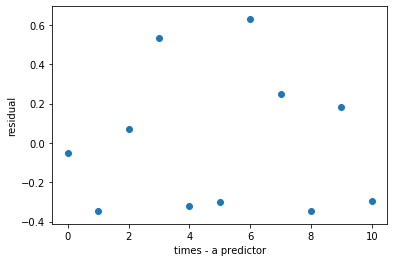

In [14]:
plt.scatter(times,residual)
plt.xlabel("times - a predictor")
plt.ylabel("residual")
plt.show()

Now it's you time to practice!

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston.DESCR)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()
X = boston_df[['LSTAT']].values
y = boston_df['MEDV'].values